In [25]:
import pandas as pd
# Visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("C:/Users/amant/OneDrive/Desktop/Assignment/Data Source (sales_transactions) (1).csv")
df.head()

,TransactionID,CustomerID,TransactionDate,ProductID,ProductCategory,Quantity,PricePerUnit,TotalAmount,TrustPointsUsed,PaymentMethod,DiscountApplied
0,1,1002.0,08/08/24 22:00,2008,Grocery,1,10.0,10.0,20,Trust Points,5.0
1,2,NaN,07/08/24 1:00,2004,Home Decor,1,10.0,10.0,0,Credit Card,20.0
2,3,1004.0,02/08/24 19:00,2002,Grocery,3,30.0,90.0,0,Credit Card,25.0
3,2,1003.0,07/08/24 17:00,2001,Toys,2,30.0,60.0,50,NaN,20.0
4,5,1001.0,09/08/24 9:00,2008,Grocery,1,NaN,NaN,20,Trust Points,5.0


In [36]:
# Data Preprocessing
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], format='%d/%m/%Y %H:%M', errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['PricePerUnit'] = pd.to_numeric(df['PricePerUnit'], errors='coerce')
df['TotalAmount'] = df['Quantity'] * df['PricePerUnit']

In [72]:
# Handling missing values
df['CustomerID'].fillna('Unknown', inplace=True)
df['TransactionDate'].fillna(method='ffill', inplace=True)
df['PricePerUnit'].fillna(df.groupby('ProductCategory')['PricePerUnit'].transform('mean'), inplace=True)
df['TotalAmount'].fillna(df['Quantity'] * df['PricePerUnit'], inplace=True)
df['PaymentMethod'].fillna('Unknown', inplace=True)

# Check and remove outliers or inconsistent data
df = df[df['Quantity'] > 0]
df = df[df['TotalAmount'] > 0]

# Aggregation
aggregation = {
    'TotalAmount': 'sum',
    'Quantity': 'sum',
    'TrustPointsUsed': 'sum',
    'DiscountApplied': 'sum'
}

aggregated_data = df.groupby('ProductCategory').agg(aggregation)

In [79]:
# Data Validation: Checking for any remaining inconsistencies
print(df.describe())
print(df.isnull().sum())

       TransactionID      TransactionDate    ProductID   Quantity  \
count      50.000000                   50    50.000000  50.000000   
mean       25.460000  2024-05-14 03:24:00  2004.920000   1.660000   
min         1.000000  2024-01-08 04:00:00  2001.000000   1.000000   
25%        13.250000  2024-02-08 20:45:00  2003.000000   1.000000   
50%        25.500000  2024-06-08 02:30:00  2005.000000   1.000000   
75%        37.750000  2024-08-01 00:45:00  2007.000000   2.000000   
max        50.000000  2024-10-08 00:00:00  2008.000000   5.000000   
std        14.640188                  NaN     2.284285   0.960655   

       PricePerUnit  TotalAmount  TrustPointsUsed  DiscountApplied  
count     50.000000    50.000000        50.000000        50.000000  
mean     131.779221   205.807792        31.200000        21.500000  
min       10.000000    10.000000         0.000000         0.000000  
25%       30.000000    30.000000         0.000000        10.000000  
50%       47.272727    90.000000 

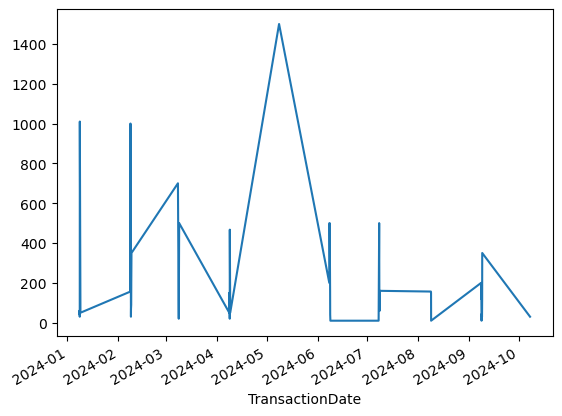

In [88]:
df.groupby('TransactionDate')['TotalAmount'].sum().plot(kind='line')
plt.show()

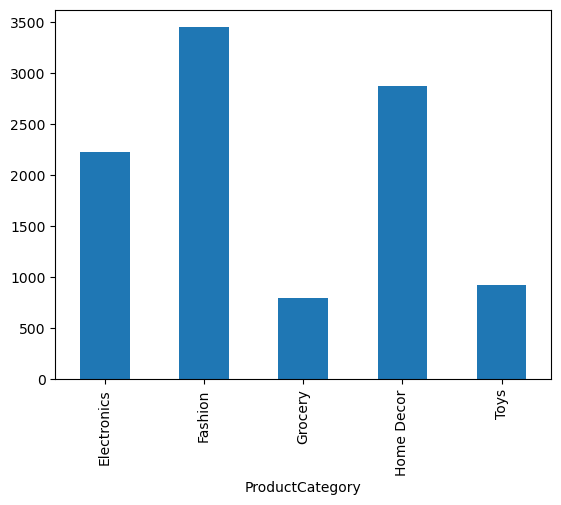

In [97]:
df.groupby('ProductCategory')['TotalAmount'].sum().plot(kind='bar')
plt.show()